<div style = "text-align: right"><font size = 3 color = "#B22222" face = "verdana"><b>- Data Hackerman Red Zone - </b></font></div>
<div style = "text-align: right"><font size = 2 color = "#BA22CC" face = "verdana"><b>Red Zone Final Project</b></font></div>
<div style = "text-align: right"><font><i>By 'Jacob Moyosade</i></font></div>
<div style = "text-align: right"><font>17th April 2025</font></div>

In [47]:
#!pip install matplotlib seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
pd.options.display.max_columns = 200

import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.options.display.max_colwidth = None
pd.set_option("display.float_format", lambda x: '%.9f' % x)

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
pwd

'C:\\Users\\Tunji-PC\\datahackerman_c3rz\\datahackerman_rdzone_proj'

In [3]:
FILE_NAME = "dataset.csv"
DATA_FOLDER = "data"

In [4]:
main_path = os.getcwd()

In [5]:
file_path = os.path.join(os.path.join(main_path, DATA_FOLDER), FILE_NAME)

In [6]:
file_path

'C:\\Users\\Tunji-PC\\datahackerman_c3rz\\datahackerman_rdzone_proj\\data\\dataset.csv'

In [7]:
park_birmingham_dataset = pd.read_csv(file_path)

# Data Inspection

In [8]:
park_birmingham_dataset.head()

,SystemCodeNumber,Capacity,Occupancy,LastUpdated
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48


In [9]:
park_birmingham_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35717 entries, 0 to 35716
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SystemCodeNumber  35717 non-null  object
 1   Capacity          35717 non-null  int64 
 2   Occupancy         35717 non-null  int64 
 3   LastUpdated       35717 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.1+ MB


In [10]:
park_birmingham_dataset["LastUpdated"] = pd.to_datetime(park_birmingham_dataset["LastUpdated"])

In [11]:
park_birmingham_dataset.head()

,SystemCodeNumber,Capacity,Occupancy,LastUpdated
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48


In [16]:
# Add a column for time only
park_birmingham_dataset['Time'] = park_birmingham_dataset['LastUpdated'].dt.strftime('%H:%M:%S')

In [17]:
park_birmingham_dataset.head()

,SystemCodeNumber,Capacity,Occupancy,LastUpdated,Time,Occupancy_Percentage
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42,07:59:42,10.571923744
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42,08:25:42,11.091854419
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42,08:59:42,13.864818024
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46,09:32:46,18.544194107
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48,09:59:48,25.996533795


# Exploratory Data Analysis

In [18]:
park_birmingham_dataset.describe()

,Capacity,Occupancy,LastUpdated,Occupancy_Percentage
count,35717.000000000,35717.000000000,35717,35717.000000000
mean,1397.550130190,642.228910603,2016-11-11 18:11:47.708290304,49.333772539
min,220.000000000,-8.000000000,2016-10-04 07:46:28,-1.666666667
25%,500.000000000,210.000000000,2016-10-24 16:33:03,25.588140509
50%,849.000000000,446.000000000,2016-11-11 14:00:21,47.187165775
75%,2009.000000000,798.000000000,2016-11-29 13:28:30,71.750433276
max,4675.000000000,4327.000000000,2016-12-19 16:30:35,104.134366925
std,1179.326832567,656.955534593,NaN,27.135313696


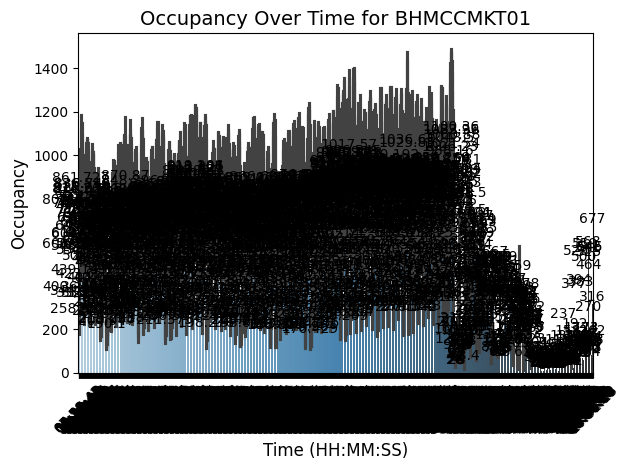

In [19]:
# Create a bar chart using the Time column
ax = sns.barplot(x='Time', y='Occupancy', data=park_birmingham_dataset, palette='Blues_d')
for i in ax.containers:
    ax.bar_label(i)

plt.title('Occupancy Over Time for BHMCCMKT01', fontsize=14)
plt.xlabel('Time (HH:MM:SS)', fontsize=12)
plt.ylabel('Occupancy', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
# Calculate occupancy percentage
park_birmingham_dataset['Occupancy_Percentage'] = (park_birmingham_dataset['Occupancy'] / park_birmingham_dataset['Capacity']) * 100

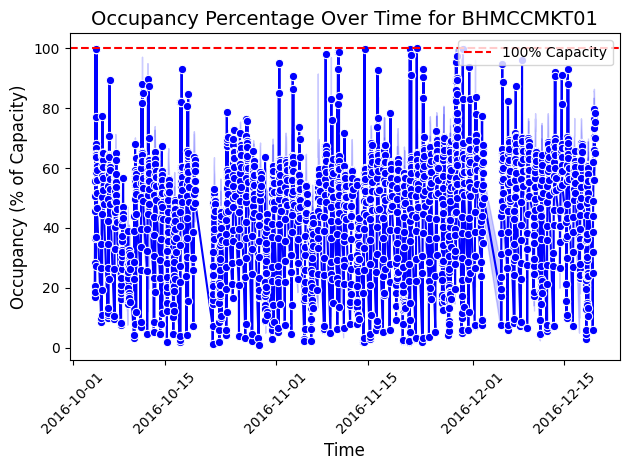

In [23]:
# Create a line plot for percentage
sns.lineplot(x='LastUpdated', y='Occupancy_Percentage', data=park_birmingham_dataset, marker='o', color='blue')
plt.axhline(y=100, color='red', linestyle='--', label='100% Capacity')

plt.title('Occupancy Percentage Over Time for BHMCCMKT01', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Occupancy (% of Capacity)', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig("images/Occupancy percentage.png")
plt.show()

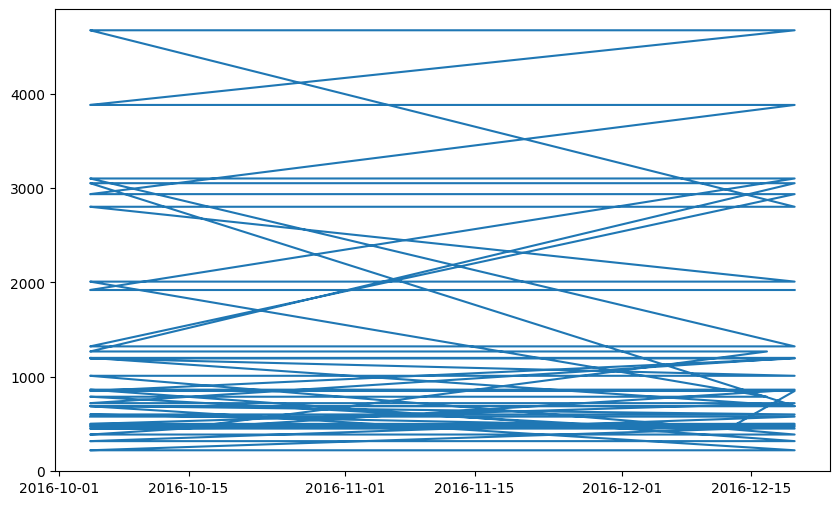

In [40]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(park_birmingham_dataset["LastUpdated"], park_birmingham_dataset["Capacity"])
plt.savefig("images/park_capacity plot.png")

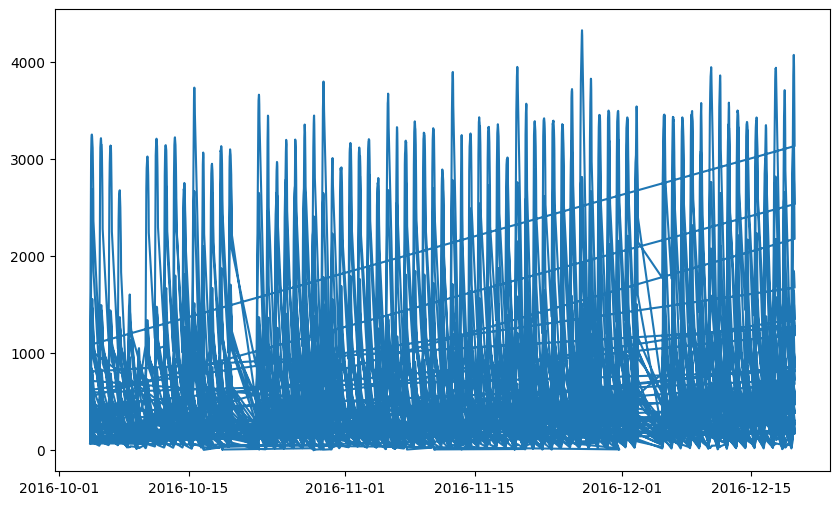

In [41]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(park_birmingham_dataset["LastUpdated"], park_birmingham_dataset["Occupancy"])
plt.savefig("images/park_occupancy plot.png")

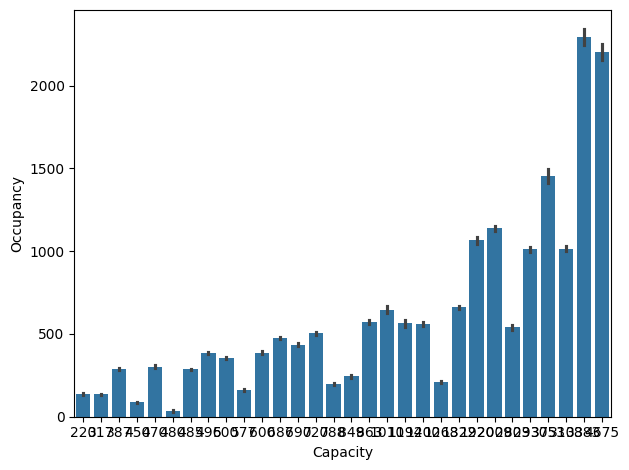

<Figure size 640x480 with 0 Axes>

In [22]:
sns.barplot(x='Capacity', y='Occupancy', hue=None, data=park_birmingham_dataset)
plt.tight_layout()
plt.show()
plt.savefig("images\park_birm_barchart.png")